In [1]:

# Imports
from xlrd.formula import dump_formula
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics as st

#To read/write data from Google Drive:
#Reference: https://colab.research.google.com/notebooks/io.ipynb#scrollTo=u22w3BFiOveAå
from google.colab import drive
drive.mount('/content/drive')

# Conocer la cantidad y nombre de las hojas
xl = pd.ExcelFile('/content/drive/My Drive/Royal Distribuidora/FACTURACION ROYAL.xlsx')
hojas = len(xl.sheet_names)
nombres_hojas = xl.sheet_names

# Creo lista de df's
dataframes = []

for sheet in range(hojas):
  # Read File
  df = pd.read_excel('/content/drive/My Drive/Royal Distribuidora/FACTURACION ROYAL.xlsx', sheet_name = sheet)
  
  # Quedarnos con solo las columnas importantes
  columnas =['marca','descripcion','costo uni','cant','total costo','Precio Venta',
          'IIBB','Cargo Mercado Pago','Comision Plataforma','Flete','ML Total','Ganacia neta x uni',
          'Total Gan Neta','Medio Venta','Tipo de Venta (Flex o Correo)','Mensajeria (Octa o Hormiga)',
          'Prov Cliente']
  df1 = pd.DataFrame()
  for col in columnas:
    try:
      df1[col] = df[col]
    except:
      df1[col] = ''
  df = df1.copy()

  # Agrego el tipo y cantidad de gastos
  for i,v in enumerate(df['costo uni'].values):
    if v == 'Cantidad' or v == 'cantidad':
      indice = i
  tipo_gasto = pd.DataFrame(list(df['descripcion'][indice+1:-1])).dropna()
  cantidad_gasto = pd.DataFrame(list(df['costo uni'][indice+1:-1]))[0:len(tipo_gasto)]
  df['tipo_gasto'] = tipo_gasto
  df['cantidad_gasto'] = cantidad_gasto
  
  # Drop de las filas que no sean productos
  df.drop(df.index[len(df.marca.dropna()):len(df.marca)], axis=0, inplace=True)
  df['mes'] = nombres_hojas[sheet]
  
  # Agrego el df final a la lista de df's
  dataframes.append(df)

# Unir df
results = pd.concat(dataframes)
results.reset_index(inplace=True)
results.drop('index', axis=1, inplace=True)
df = results.copy()

# Eliminado de espacios
iterar = ['marca','descripcion']
for columna in iterar:
  for i,v in enumerate(df[columna].values):
    try:
      if df[columna][i][-1] == ' ':
        df[columna][i] = df[columna][i][:-1]
    except:
      continue

# Agrego la columna del nombre completo del producto
df['Producto_Completo'] = df['marca'] + ' ' + df['descripcion']

df.head()

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,marca,descripcion,costo uni,cant,total costo,Precio Venta,IIBB,Cargo Mercado Pago,Comision Plataforma,Flete,...,Ganacia neta x uni,Total Gan Neta,Medio Venta,Tipo de Venta (Flex o Correo),Mensajeria (Octa o Hormiga),Prov Cliente,tipo_gasto,cantidad_gasto,mes,Producto_Completo
0,X-Body Evolution,Collagen Anana,1413.0,1.0,1413.00,2928.00,0.035,226.36,0.0,400.0,...,727.00,727.00,Instagram,,,Bs As,Suscripcion Portal,0.0,NOVIEMBRE,X-Body Evolution Collagen Anana
1,Hoch Sport,Creatina x 300 gr,1781.0,1.0,1781.00,2580.00,0.000,0.00,0.0,70.0,...,729.00,729.00,Whatssapp,,,Chubut Puerto Madryn,Impresion,10.0,NOVIEMBRE,Hoch Sport Creatina x 300 gr
2,Optimun Nutrition,100 % Whey Gold Vainilla Icecream X 5 Lbs,11937.12,1.0,11937.12,20981.94,0.000,0.00,3135.0,585.0,...,5242.88,5242.88,Meli,,,Cordoba,Packaging,1800.0,NOVIEMBRE,Optimun Nutrition 100 % Whey Gold Vainilla Ice...
3,BSN,Syntha 6 ISOLATE x 2 Lbs,7231.14,1.0,7231.14,10990.00,384.650,850.00,0.0,0.0,...,2523.86,2523.86,Instagram,,,Bs As,Transporte,0.0,NOVIEMBRE,BSN Syntha 6 ISOLATE x 2 Lbs
4,Cellucor,C4 60 Servicios Blue Razz,8004.0,1.0,8004.00,12813.00,640.000,990.00,NaN,414.0,...,2765.00,2765.00,Emprende Tienda,,,Tucuman,Suscripcion Portal,499.0,DICIEMBRE,Cellucor C4 60 Servicios Blue Razz


In [ ]:
# Todos los tipos de productos
df['Producto_Completo'].unique()

array(['X-Body Evolution Collagen Anana', 'Hoch Sport Creatina x 300 gr',
       'Optimun Nutrition 100 % Whey Gold Vainilla Icecream X 5 Lbs',
       'BSN Syntha 6 ISOLATE x 2 Lbs',
       'Cellucor C4 60 Servicios Blue Razz',
       'BSN Syntha 6 Isolate 2 Libras', 'Universal Fish Oil',
       'Gold Nutrition Vegetal Protein Isolate',
       'Optimun Nutrition Gold Standard Whey 5 Libras',
       'Optimun Nutrition Gold Standard Whey 2 Libras',
       'Star Nutrition Creatine 300 gr', 'Star Nutrition Creatina 300 gr',
       'Optimun Nutrition Whey Gold Standard 5 Lb',
       'Optimun Nutrition Whey Gold Standard 2 Lb',
       'Universal Fish Oil Omega 3', 'BSN Syntha 6 Isolate Chocolate',
       'Optimun Nutrition Tribulus 100 caps', 'Gentech Multivitaminico',
       'Star Nutrition Pump 3D Ripped', 'Universal Super Cuts 3',
       'Optimun Nutrition Gold Standard Whey 2 Lb', 'Nutrilab Creatina',
       'Optimun Nutrition Creatine Micronized',
       'BSN Syntha 6 Isolate 2 Lb Vaini

In [ ]:
# Ganancia por producto

productos = ['Optimun Nutrition Creatine Micronized', 'Universal Creatine 200 gr', 'Universal Super Cuts 3', 'Nutrilab Creatina Shock','Nutrilab Creatina','Nutrex Lipo 6 Training']
df_productos = df.copy()
for i,v in enumerate(df.Producto_Completo.values):
  if v not in productos:
    df_productos.drop(i, axis=0, inplace=True)

df_productos.groupby('Producto_Completo').sum().sort_values('Ganacia neta x uni',ascending=False)['Ganacia neta x uni']

Producto_Completo
Optimun Nutrition Creatine Micronized    84407.0
Universal Creatine 200 gr                14394.0
Universal Super Cuts 3                   10382.0
Nutrex Lipo 6 Training                    2302.0
Nutrilab Creatina                         2125.0
Nutrilab Creatina Shock                   1464.0
Name: Ganacia neta x uni, dtype: float64

In [ ]:
df_productos['Producto_Completo'].value_counts()

Optimun Nutrition Creatine Micronized    47
Universal Super Cuts 3                   10
Universal Creatine 200 gr                 8
Nutrilab Creatina                         3
Nutrex Lipo 6 Training                    2
Nutrilab Creatina Shock                   1
Name: Producto_Completo, dtype: int64

# Octa

Responsabilidades:

1. Almacenar los productos en su deposito
2. Despachar (correo y darle los flex a hormiga)
3. Recibir y pagar los pedidos de dyd y de trust (lo cual implica extraer el dinero)
4. Q cliente retire por su deposito

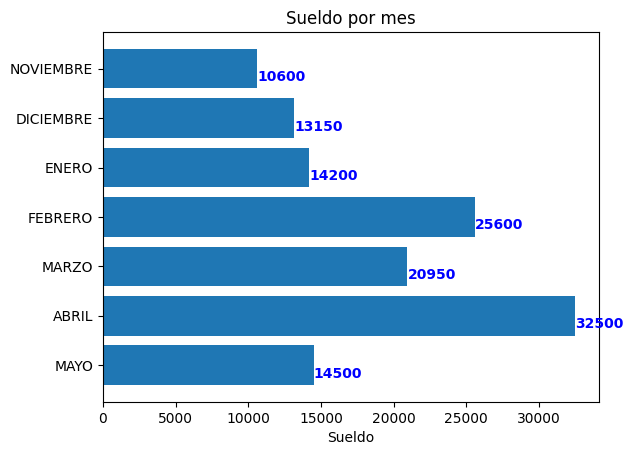

In [13]:
Mes = []
Ventas = []
for mes in results.mes.unique():
  Mes.append(mes)
  Ventas.append(len(results[results.mes == mes]))
comision = 150
sueldo = 10000
GananciaOcta = [(ven*comision)+sueldo for ven in Ventas]
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
ax.barh(Mes, GananciaOcta, align='center')
ax.set_yticks(Mes)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Sueldo')
ax.set_title('Sueldo por mes')

for i, v in enumerate(GananciaOcta):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')

plt.show()